# Square wave Fourier coefficients (supplementary)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We began with the square wave

$$
\begin{equation*}
  x(t) = \begin{cases}
           1, \quad  0 < t < \pi,\\
           -1, \quad \pi < t < 2\pi
         \end{cases}
       \end{equation*}
$$

We evaluated the Fourier coefficients and obtained

$$
\begin{eqnarray*}
  x(t) &=& \sum_{k=1}^{\infty} b_{k} \sin(k t) , \quad  b_{k} = \begin{cases}
              0, \quad k \hbox{ even}\\
              4 / k\pi,\quad k \hbox{ odd} 
              \end{cases}
\end{eqnarray*}
$$

Let's plot a couple of these harmonics separately, then see how they combine.

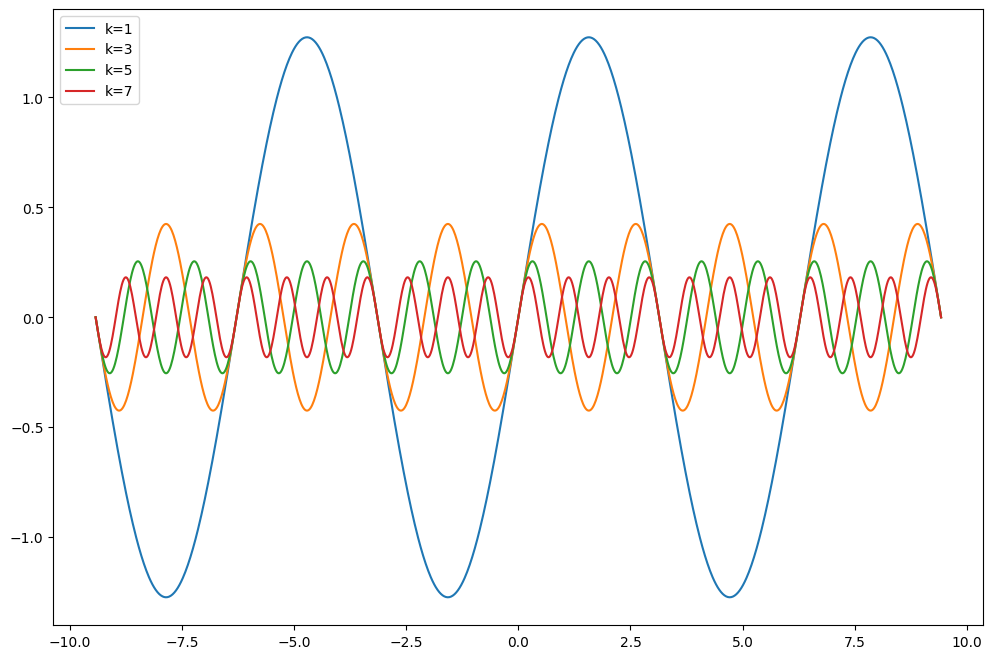

In [2]:
t_range = np.linspace(-3*np.pi, 3*np.pi, 1000)

plt.figure(figsize=(12, 8))
for k in range(1, 8, 2): # First four odd harmonics
    plt.plot(t_range, 4 / (k * np.pi) * np.sin(k * t_range), label=f"k={k}") 
plt.legend()

We can see how everything "fits" inside the shape of a square wave. Note also the fact that we have odd harmonics, which cause the signal to accumulate symmetrically near the sides of the wave, instead of in the middle. Let's sum them up and see what happens.

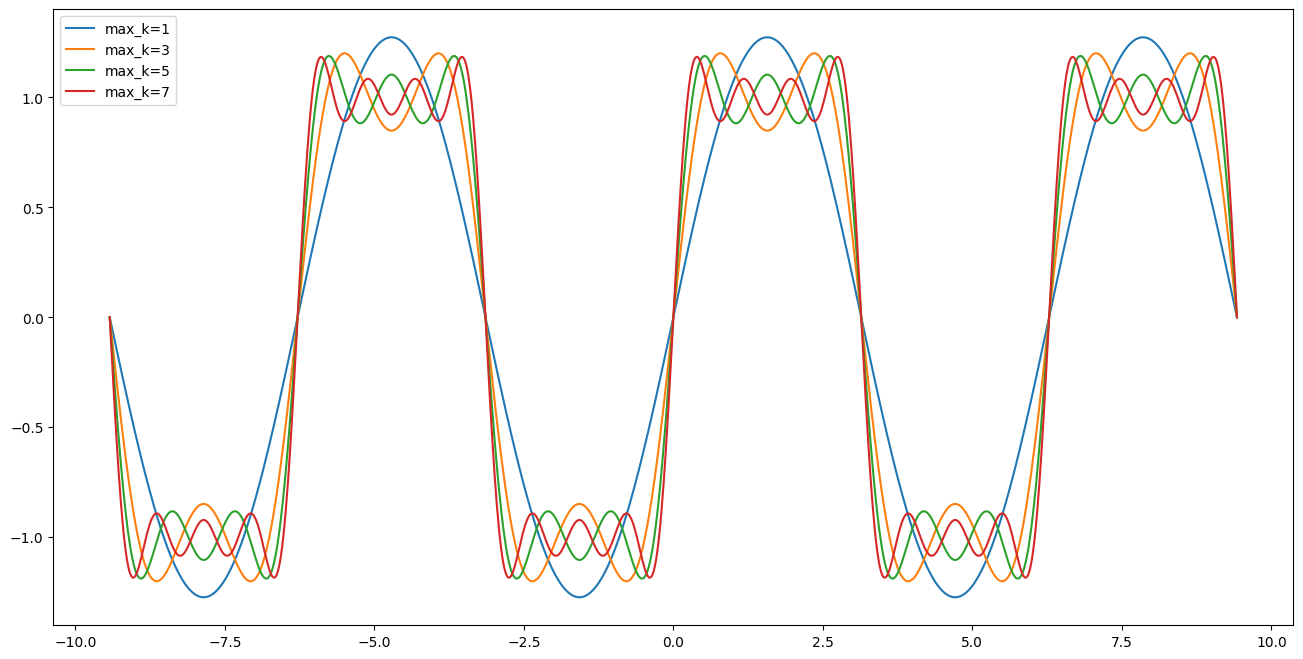

In [3]:
plt.figure(figsize=(16, 8))

for max_k in range(1, 8, 2): # First four odd harmonics
    signal_sum = np.zeros_like(t_range)
    for k in range(1, max_k+1, 2):
        signal_sum += 4 / (k * np.pi) * np.sin(k * t_range)
    plt.plot(t_range, signal_sum, label=f"max_k={max_k}") 
plt.legend()

We can equivalently re-express the signal as a full Fourier series by using Euler's relation:

$$
\begin{eqnarray*}
  x(t) &=& \sum_{k=1}^{\infty} b_{k} \sin(k t) \\
    &=& \sum_{k=1}^{\infty} \frac{4}{k\pi} \frac{ \left( e^{jkt} - e^{-jkt} \right)}{2j} \\
    &=& \sum_{k=1}^{\infty} -\frac{2j}{k\pi}  \left( e^{jkt} - e^{-jkt} \right) \\
    &=& \sum_{k=1}^{\infty} -\frac{2j}{k\pi} e^{jkt} - \sum_{k=1}^{\infty} \left(-\frac{2j}{k\pi} \right) e^{-jkt} \\
    &=& \sum_{k=1}^{\infty} -\frac{2j}{k\pi} e^{jkt} - \sum_{k=-1}^{-\infty} \left(\frac{2j}{k\pi} \right) e^{jkt} \\
    &=& \sum_{k=-\infty}^{\infty} -\frac{2j}{k\pi} e^{jkt}
\end{eqnarray*}
$$

where we still have the condition that only odd $k$ contribute.

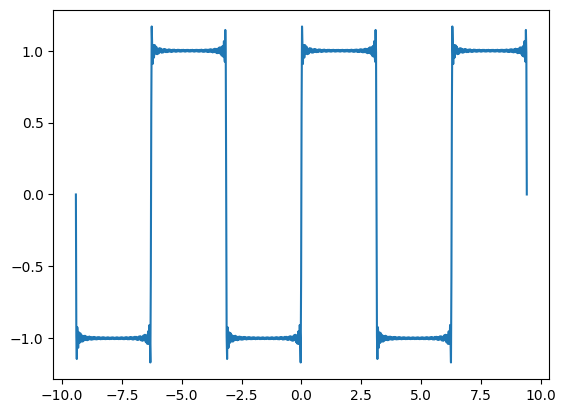

In [4]:
def coeffs(k):
    return -2j / (k * np.pi) if k % 2 == 1 else 0

def square_shifted(t, ω, max_k=100):
    """Fourier synthesis equation. Sum from -max_k to max_k+1 now"""
    return np.sum([coeffs(k) * np.exp(1j * k * ω * t) for k in range(-max_k, max_k+1)]).real

plt.plot(t_range, [square_shifted(t, 1) for t in t_range]) 

Finally, let's see what happens if we instead plot the even harmonics.

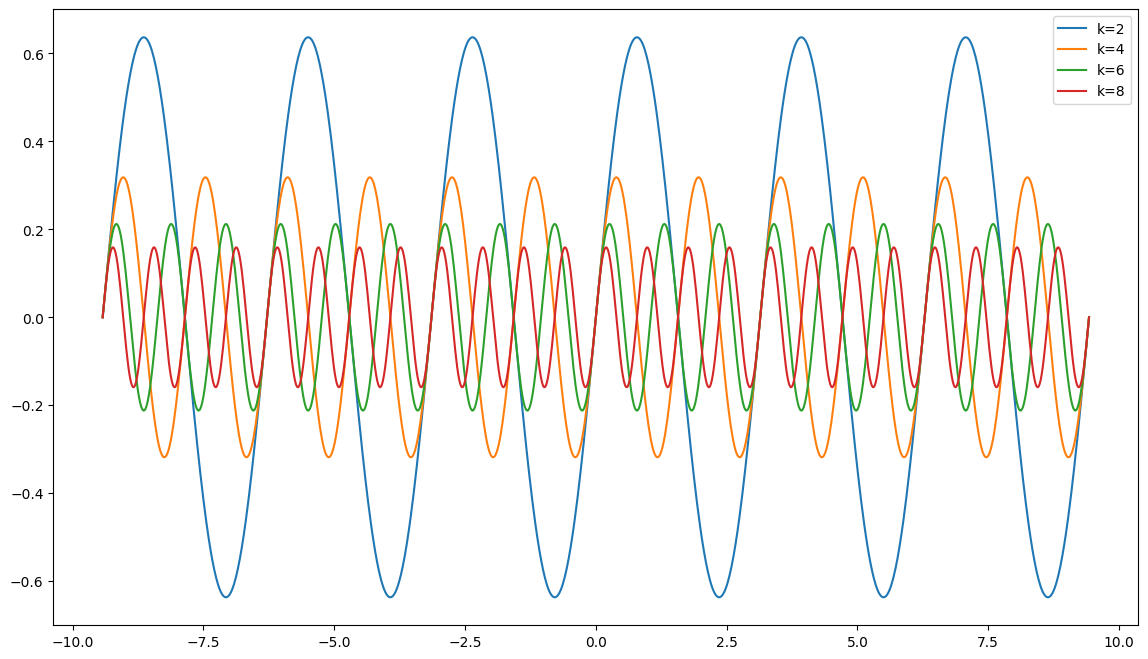

In [5]:
plt.figure(figsize=(14, 8))
for k in range(2, 9, 2): # First four odd harmonics
    plt.plot(t_range, 4 / (k * np.pi) * np.sin(k * t_range), label=f"k={k}") 
plt.legend();

You may already be able to see that this won't lead to a square wave.

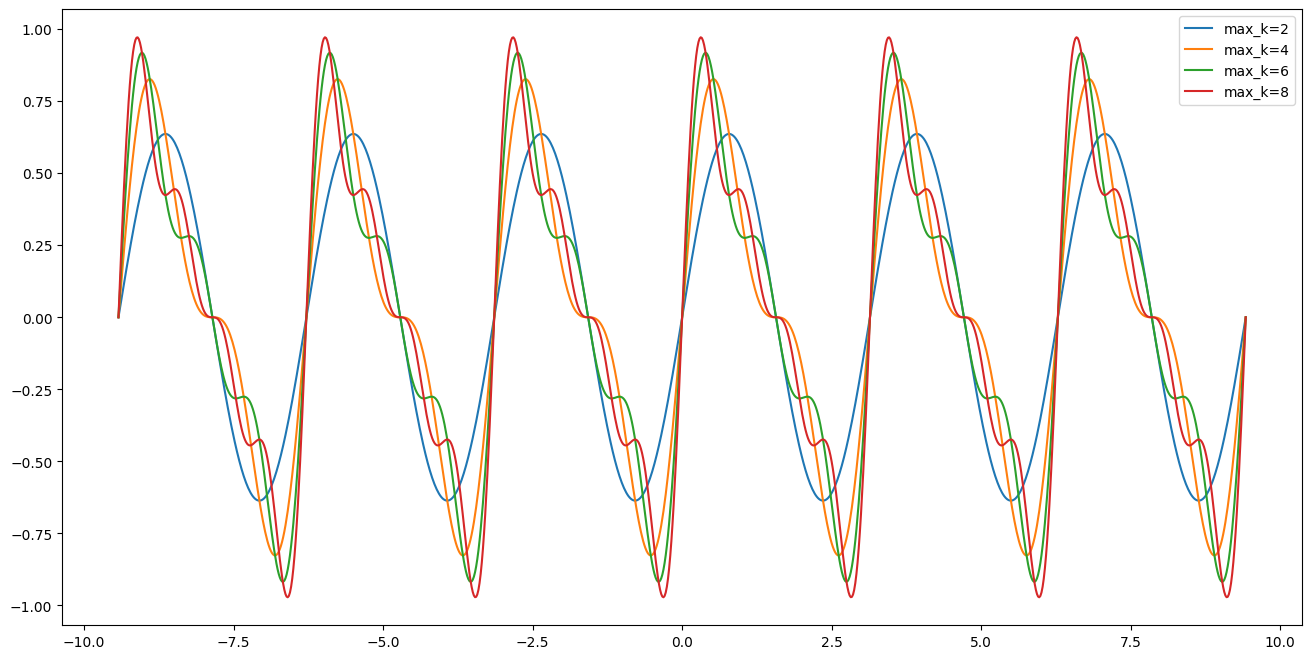

In [6]:
plt.figure(figsize=(16, 8))

for max_k in range(2, 9, 2): # First four odd harmonics
    signal_sum = np.zeros_like(t_range)
    for k in range(2, max_k+1, 2):
        signal_sum += 4 / (k * np.pi) * np.sin(k * t_range)
    plt.plot(t_range, signal_sum, label=f"max_k={max_k}") 
plt.legend()

This is a perfectly valid signal, it's just not a square wave! In the limit of infinite $k$, it's called a sawtooth.